In [69]:
# -*-coding:utf-8 -*-
# import all the libraries 
# python==3.8; jupyterlab==3.0.12; lumicks.pylake==0.8.1; matplotlib==3.3.4; more-itertools==8.7.0;
# npTDMS==1.1.0; numpy==1.20.1; opencv-python==4.5.1.48; pandas==1.2.3; scipy==1.6.1; tifffile==2021.3.5
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize
%matplotlib widget

# Plot reference 
1. Setting a relative frequency in a matplotlib histogram [https://stackoverflow.com/questions/9767241/setting-a-relative-frequency-in-a-matplotlib-histogram]
2. Bin size in Matplotlib (Histogram) [https://stackoverflow.com/questions/6986986/bin-size-in-matplotlib-histogram]
3. logscale axis [https://stackoverflow.com/questions/773814/plot-logarithmic-axes-with-matplotlib-in-python]
4. binwidth for histogram Using the The Freedman-Diaconis Rules to calculate the binwidth: The bin-width is set to h=2×IQR×n^(−1/3),the number of bins is (max−min)/h; where IQR is the interquartile range of the data and n is the number of observations in the sample [https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram]
5. Alternatively, The simplest method is to set the number of bins equal to the square root of the number of values you are binning.
6. Generate random numbers from exponential distribution [https://stackoverflow.com/questions/47319277/generate-random-numbers-from-exponential-distribution-and-model-using-python]
7. error band plot [https://stackoverflow.com/questions/55368485/draw-error-shading-bands-on-line-plot-python?noredirect=1&lq=1]

[ 9.43662905  3.58722016  5.81640624 ...  5.89838406 11.98244626
 13.64255547]
[ 0.25541103  0.76503773  1.27466444  1.78429114  2.29391785  2.80354455
  3.31317126  3.82279797  4.33242467  4.84205138  5.35167808  5.86130479
  6.3709315   6.8805582   7.39018491  7.89981161  8.40943832  8.91906502
  9.42869173  9.93831844 10.44794514 10.95757185 11.46719855 11.97682526
 12.48645197 12.99607867 13.50570538 14.01533208 14.52495879 15.0345855
 15.5442122  16.05383891 16.56346561 17.07309232 17.58271902 18.09234573
 18.60197244 19.11159914 19.62122585 20.13085255 20.64047926 21.15010597
 21.65973267 22.16935938 22.67898608 23.18861279 23.69823949 24.2078662
 24.71749291 25.22711961 25.73674632 26.24637302 26.75599973 27.26562644
 27.77525314 28.28487985 28.79450655 29.30413326 29.81375996 30.32338667
 30.83301338 31.34264008 31.85226679 32.36189349 32.8715202  33.38114691
 33.89077361 34.40040032 34.91002702 35.41965373 35.92928043 36.43890714
 36.94853385 37.45816055 37.96778726 38.4774139

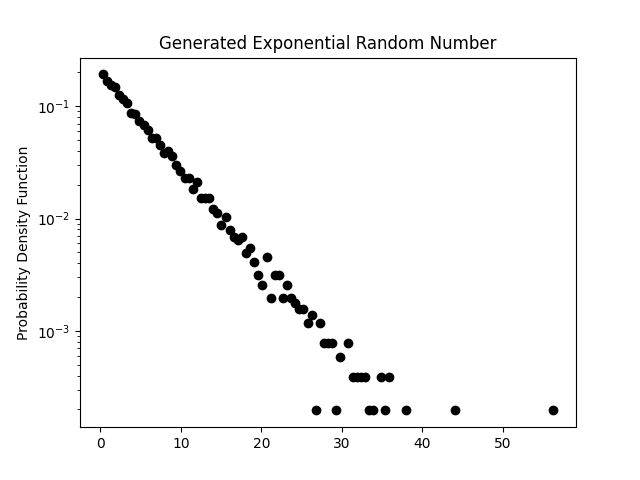

In [75]:
# Generate random numbers from exponential distribution
data = np.random.exponential(5, size=10000)
print((data))

#calculate interquartile range and subsequent binwidth, and then histogram
q3, q1 = np.percentile(data, [75 ,25])
iqr = q3 - q1
binwidth = (2* iqr) * len(data) ** (-1/3)

ydata,base = np.histogram(data,bins = np.arange(min(data), max(data)+ binwidth, binwidth), density = 'True')
xdata = base[:-1] + 0.5*binwidth
print(xdata)
plt.figure()
plt.scatter(xdata, ydata, color="k")
plt.yscale('log')
# plt.ylim(0.01,1)
plt.ylabel('Probability Density Function')
plt.title('Generated Exponential Random Number')
plt.show()

R² = 0.9988111937401036


Text(0, 0.5, 'Probability Density Function')

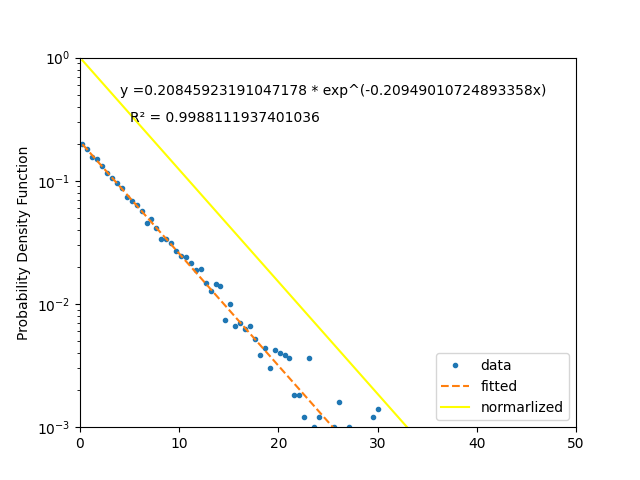

In [74]:
# fit the data with a monoExponential decay curve
def monoExp(x, a, k):
    return a * np.exp(-k * x) 

# perform the fit
popt, pcov = scipy.optimize.curve_fit(monoExp, xdata, ydata)
# a is the initial value A1, k is the decay constant
a, k = popt

# determine quality of the fit
squaredDiffs = np.square(ydata - monoExp(xdata, a, k))
squaredDiffsFromMean = np.square(ydata - np.mean(ydata))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot extroplating fitted curve
xdata2 = np.arange(0,15,0.5)
ydata2 = monoExp(xdata2, a, k)/a
# plot the results
plt.figure()
plt.plot(xdata, ydata, '.', label="data")
plt.plot(xdata, monoExp(xdata, a, k), '--', label="fitted")
plt.plot(xdata, monoExp(xdata, a, k)/a, 'yellow', label="normarlized")
# plt.plot(xdata2,ydata2)

plt.text(4,0.5,'y =' + str(a) + ' * exp^('+ str(-k)+'x)')
plt.text(5,0.3,'R² = ' + str(rSquared))
plt.yscale('log')
plt.ylim(0.001,1)
plt.xlim(0,50)
plt.legend(loc = 'lower right')
plt.ylabel('Probability Density Function')
# plt.xlabel('Time(s)')
# plt.title("Duration Analysis")
# fig.savefig(trace_file[:-4]+ '_duration-analysis' +'.png', dpi=150)

# Form now on, we start to bootstrap the data

In [66]:
# Generate random numbers from exponential distribution
data = np.random.exponential(5, size=1000)
# print(len(data))

In [76]:
# random sampling
resampling_ratio = 0.5
resampling_times = 1000

# define a monoExponential decay fit function
def monoExp(x, a, k):
    return a * np.exp(-k * x) 

# define a function to compute the decay constant from an exponential decay fit, with return of decay constant
def ExoDecFit (data):
    #calculate interquartile range and subsequent binwidth, and then histogram
    q3, q1 = np.percentile(data, [75 ,25])
    iqr = q3 - q1
    binwidth = (2* iqr) * len(data) ** (-1/3)
    ydata,base = np.histogram(data,bins = np.arange(min(data), max(data)+ binwidth, binwidth), density = 'True')
    xdata = base[:-1] + 0.5*binwidth

    # perform the fit
    popt, pcov = scipy.optimize.curve_fit(monoExp, xdata, ydata)
    # a is the initial value A1, k is the decay constant
    a, k = popt
    return k

decay_constant_ls = []
for i in range (resampling_times):
    # random sampling with replacement method,
    data_resampling = np.random.choice(data, size= int(resampling_ratio * len(data)), replace=True)
    decay_constant = ExoDecFit(data_resampling)
    decay_constant_ls.append(decay_constant)

        # return format(np.mean(decay_constant_ls),'.4f'),format (np.std(decay_constant_ls),'.4f')
    
print(len(decay_constant_ls))
print(np.mean(decay_constant_ls))
print(np.std(decay_constant_ls))

1000
0.20161842632288476
0.00474754926225269
